In [276]:
# Level 1

In [277]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import sys
import string
import re
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_extraction.text as fe_text

In [278]:
def preprocess_docs(docs):
    '''英文書集合 docs に対し前処理を施し、分かち書きしたリストのリストとして返す。

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :return (list): 文分割、単語分割、基本形、ストップワード除去した結果。
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    for punct in string.punctuation:
        stopwords.append(punct)

    result = []
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                if (this_word not in stopwords) and (re.search("[a-zA-Z]+", this_word) is not None) and (this_word not in result):
                    result.append(this_word)
    return result


In [279]:
def make_vectors_eng(docs, codebook):
    '''コードブックを素性とする文書ベクトルを作る（直接ベクトル生成）

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :param codebook(list): ユニークな単語一覧。
    :return (list): コードブックを元に、出現回数を特徴量とするベクトルを返す。
    '''
    vectors = []
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        this_vector = []
        fdist = nltk.FreqDist()
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                fdist[this_word] += 1
        for word in codebook:
            this_vector.append(fdist[word])
        vectors.append(this_vector)
    return vectors

In [280]:
def cos_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [281]:
docs = []
files = []
for i in range(13):
    fname = f"./data/ch{i:02}.html.txt"
    print(fname)
    files.append(fname)
for fname in files:
    with open(fname, 'r') as f:
            docs.append(f.read())
wordlist = preprocess_docs(docs)
print(wordlist)

./data/ch00.html.txt
./data/ch01.html.txt
./data/ch02.html.txt
./data/ch03.html.txt
./data/ch04.html.txt
./data/ch05.html.txt
./data/ch06.html.txt
./data/ch07.html.txt
./data/ch08.html.txt
./data/ch09.html.txt
./data/ch10.html.txt
./data/ch11.html.txt
./data/ch12.html.txt
['preface', 'book', 'natural', 'language', 'processing', 'mean', 'used', 'everyday', 'communication', 'human', 'like', 'english', 'hindi', 'portuguese', 'contrast', 'artificial', 'programming', 'mathematical', 'notation', 'evolved', 'pas', 'generation', 'hard', 'pin', 'explicit', 'rule', 'take', 'nlp', 'short', 'wide', 'sense', 'cover', 'kind', 'computer', 'manipulation', 'one', 'extreme', 'could', 'simple', 'counting', 'word', 'frequency', 'compare', 'different', 'writing', 'style', 'involves', 'understanding', 'complete', 'utterance', 'least', 'extent', 'able', 'give', 'useful', 'response', 'technology', 'based', 'becoming', 'increasingly', 'widespread', 'example', 'phone', 'handheld', 'support', 'predictive', 'text

In [282]:
vectors = make_vectors_eng(docs, wordlist)
for index in range(len(docs)):
    print('vectors[{}] = {}'.format(index,vectors[index]))
    print('----')

vectors[0] = [1, 42, 20, 62, 26, 2, 22, 1, 1, 5, 2, 1, 1, 1, 1, 3, 21, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 27, 2, 3, 1, 8, 2, 8, 1, 6, 2, 3, 4, 1, 10, 2, 1, 3, 4, 5, 1, 2, 1, 1, 1, 1, 3, 2, 5, 1, 7, 5, 1, 1, 1, 25, 1, 1, 9, 1, 19, 1, 1, 3, 1, 1, 2, 8, 1, 1, 4, 1, 1, 7, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 7, 1, 2, 13, 4, 2, 1, 2, 1, 1, 5, 3, 1, 5, 3, 1, 1, 2, 12, 8, 11, 1, 2, 2, 9, 1, 7, 1, 3, 1, 2, 4, 12, 53, 2, 3, 1, 7, 6, 10, 46, 7, 4, 11, 25, 5, 2, 1, 16, 14, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 6, 3, 3, 3, 1, 1, 1, 2, 1, 2, 1, 4, 10, 1, 1, 8, 4, 7, 2, 6, 8, 2, 1, 1, 4, 2, 3, 4, 3, 9, 9, 1, 7, 1, 1, 2, 8, 4, 21, 6, 1, 2, 3, 2, 26, 1, 5, 3, 1, 1, 1, 5, 2, 4, 1, 2, 2, 3, 7, 7, 4, 3, 1, 1, 2, 2, 10, 4, 1, 3, 4, 1, 1, 1, 2, 1, 5, 1, 5, 1, 2, 2, 1, 1, 1, 4, 13, 2, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 7, 2, 2, 1, 5, 1, 3, 1, 9, 1, 3, 1, 1, 1, 2, 17, 3, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 4, 2, 6, 1, 1, 3, 1, 4, 2, 3, 1, 1, 5, 5, 2, 1, 2, 1, 8, 1, 1, 16, 1, 1, 1, 2, 1, 1, 1, 10, 5, 3, 1, 2, 2, 2, 4, 

In [283]:
similarities = []
for vec1 in vectors:
    temp = []
    for vec2 in vectors:
        temp.append(cos_similarity(vec1, vec2))
    similarities.append(temp)

print('# cosine_similarity')
for index in range(len(similarities)):
    print(similarities[index])

# cosine_similarity
[1.0, 0.4967687794153419, 0.37876040135508676, 0.40146981932934206, 0.4560150539100106, 0.2901840445695286, 0.2521605687969546, 0.25978690911532315, 0.24309856666885857, 0.1622520463523343, 0.18486869811614906, 0.4572014952183868, 0.697140187492654]
[0.4967687794153419, 1.0, 0.6964151288933078, 0.7570158800807929, 0.7380678968950358, 0.5400162254352182, 0.39132864197060097, 0.3158299022955598, 0.31655266413129257, 0.16607363835096328, 0.21922200863650546, 0.4490388676336373, 0.3508058096859206]
[0.37876040135508676, 0.6964151288933078, 1.0, 0.6647701588990552, 0.6402704716031481, 0.5900804223693669, 0.382583882039636, 0.34174206901632814, 0.32674938811265425, 0.20270645155151257, 0.1753934936491298, 0.5382843764163493, 0.298384044003409]
[0.40146981932934206, 0.7570158800807929, 0.6647701588990552, 0.9999999999999999, 0.6783462278563568, 0.5133577802917306, 0.3309834761201326, 0.35249129259009004, 0.3105646528196352, 0.19140340064115277, 0.23401271775293828, 0.49136

In [284]:
df = pd.DataFrame(similarities)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.496769,0.378760,0.401470,0.456015,0.290184,0.252161,0.259787,0.243099,0.162252,0.184869,0.457201,0.697140
1,0.496769,1.000000,0.696415,0.757016,0.738068,0.540016,0.391329,0.315830,0.316553,0.166074,0.219222,0.449039,0.350806
2,0.378760,0.696415,1.000000,0.664770,0.640270,0.590080,0.382584,0.341742,0.326749,0.202706,0.175393,0.538284,0.298384
3,0.401470,0.757016,0.664770,1.000000,0.678346,0.513358,0.330983,0.352491,0.310565,0.191403,0.234013,0.491367,0.289900
4,0.456015,0.738068,0.640270,0.678346,1.000000,0.515585,0.375796,0.322434,0.324925,0.254193,0.265928,0.456596,0.289911
5,0.290184,0.540016,0.590080,0.513358,0.515585,1.000000,0.395662,0.540631,0.320505,0.230925,0.193559,0.411290,0.256783
6,0.252161,0.391329,0.382584,0.330983,0.375796,0.395662,1.000000,0.329011,0.258077,0.341695,0.201714,0.319037,0.259643
7,0.259787,0.315830,0.341742,0.352491,0.322434,0.540631,0.329011,1.000000,0.516308,0.302536,0.239917,0.360837,0.237686
8,0.243099,0.316553,0.326749,0.310565,0.324925,0.320505,0.258077,0.516308,1.000000,0.446408,0.273567,0.328014,0.253818
9,0.162252,0.166074,0.202706,0.191403,0.254193,0.230925,0.341695,0.302536,0.446408,1.000000,0.265981,0.205453,0.168700


Text(0.5, 51.0, 'Number of chapter')

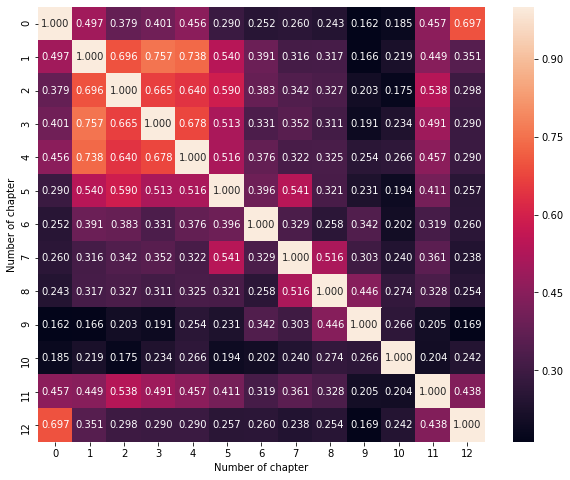

In [285]:
plt.subplots(figsize=(10,8))
sns.heatmap(df, annot=True, fmt='.3f')
plt.ylabel("Number of chapter")
plt.xlabel("Number of chapter")

In [286]:
print(len(vectors[1]), len(wordlist))
count = []
for num in range(len(wordlist)):
    temp = 0
    for i in range(len(vectors)):
        temp += vectors[i][num]
    count.append(temp)
    
index = 0
bigger_than_400 = []
for i in range(len(count)):
    if count[i] > 400:
        print(f"index = {index}, count = {count[i]}")
        bigger_than_400.append(index)
    index += 1

8962 8962
index = 3, count = 467
index = 40, count = 1605
index = 61, count = 551
index = 66, count = 770
index = 116, count = 603
index = 125, count = 471
index = 132, count = 776
index = 212, count = 494
index = 219, count = 468
index = 223, count = 530
index = 248, count = 424
index = 375, count = 496
index = 393, count = 463
index = 560, count = 442
index = 694, count = 431
index = 695, count = 592
index = 1421, count = 500
index = 2460, count = 609


In [287]:
vec1_3_9 = []
for ch in [1, 3, 9]:
    temp = []
    for i in bigger_than_400:
        temp.append(vectors[ch][i])
    vec1_3_9.append(temp)

print(vec1_3_9)

[[57, 228, 39, 133, 11, 115, 31, 71, 46, 4, 11, 26, 37, 34, 0, 7, 1, 4], [27, 262, 53, 201, 55, 90, 82, 72, 86, 2, 23, 25, 84, 31, 2, 54, 1, 11], [5, 10, 43, 1, 0, 4, 43, 6, 17, 174, 92, 13, 22, 2, 4, 119, 107, 37]]


<BarContainer object of 18 artists>

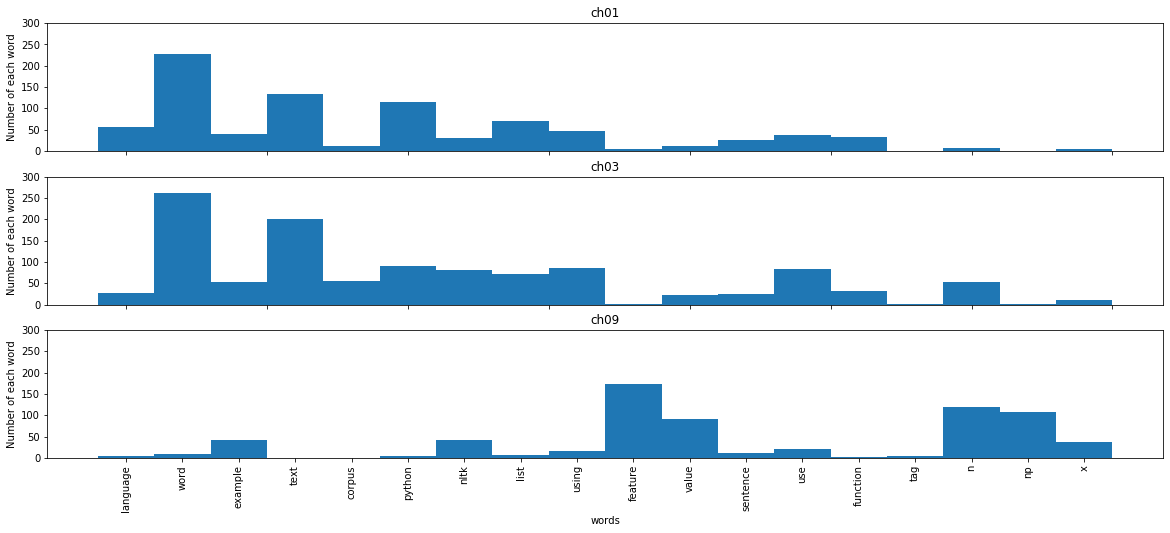

In [288]:
labels = []
for i in bigger_than_400:
    labels.append(wordlist[i])

x = list(range(len(bigger_than_400)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[0], width=1.0)
plt.subplot(3,1,2, title="ch03", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch09", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=300)
plt.bar(x, vec1_3_9[2], width=1.0)

In [289]:
# Level 2

In [290]:
def bow_tfidf(docs):
    '''Bag-of-WordsにTF-IDFで重み調整したベクトルを生成。

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :return: 重み調整したベクトル。
    '''
    my_stopwords = []
    for punct in string.punctuation:
        my_stopwords.append(punct)
    stopwords = fe_text.ENGLISH_STOP_WORDS.union(my_stopwords)
    vectorizer = fe_text.TfidfVectorizer(norm=None, stop_words=stopwords)
    vectors = vectorizer.fit_transform(docs)
    return vectors.toarray(), vectorizer

In [291]:
vectors_ex2, vectorizer = bow_tfidf(docs)
print('# BoW + tfidf')
print(vectorizer.get_feature_names())
print(vectors_ex2)

# BoW + tfidf
['00', '000', '0000000000000001000000000010000000000000000100000000000', '00000001000000010000000', '00000010000000001000000', '0000100100000001001000000010000100010000000100010000000', '0000100100000011001000000110000100010000001100010000001', '00010000000000000001000', '0008', '001913', '002679', '002733', '0037', '0037260055542', '003993', '0085', '00f3', '01', '0100100100100001001001000010100100010010000100010010000', '0105', '012', '0142', '0144', '015a', '015b', '02', '0257', '02d', '03', '04', '043478260869565216', '049297702068029296', '04x', '05', '06', '06230453042623537', '064', '0646119966', '07', '07692307692307693', '08', '0pt', '0th', '0x10ac43bd8', '0x10ac43c28', '0x10ac43d18', '0x10af37048', '0x10af37098', '0x10b067f98', '0x10b2f6958', '0x10b934b88', '0x10b936368', '0x10cfadb38', '0x10cfb02c8', '0x10cfb0318', '0x10cfb0368', '0x10cfd8188', '0x10cfd8228', '0x10d005448', '0x10fb8b3a8', '10', '100', '1000', '10000', '100000', '1001', '1005', '100554', '100m',

In [292]:
similarities = []
for vec1 in vectors_ex2:
    temp = []
    for vec2 in vectors_ex2:
        temp.append(cos_similarity(vec1, vec2))
    similarities.append(temp)

print('# cosine_similarity')
for index in range(len(similarities)):
    print(similarities[index])

# cosine_similarity
[1.0, 0.3674716518642715, 0.2232713610312431, 0.2905644760940864, 0.3353468736294506, 0.186425394479008, 0.1629853502996233, 0.13386291364956487, 0.12505339695467613, 0.06898181261707148, 0.13487237520074713, 0.25516164724449264, 0.5020748912082429]
[0.3674716518642715, 1.0, 0.43397574998321115, 0.5366593852480784, 0.5487547007428123, 0.3048390599773246, 0.21973106404572307, 0.1506217035541764, 0.16108305075211807, 0.07021660554451141, 0.14549446298544938, 0.22684486574103163, 0.23074631240441595]
[0.2232713610312431, 0.43397574998321115, 1.0, 0.4175215710679726, 0.4087353893419968, 0.3159983721864129, 0.19962713318426598, 0.1567617886067752, 0.1431363045665515, 0.06441114359211453, 0.10669187922326001, 0.28170474255318845, 0.16376087581664583]
[0.2905644760940864, 0.5366593852480784, 0.4175215710679726, 0.9999999999999999, 0.5063762064953083, 0.29428037442312366, 0.18498891332461923, 0.18550070121330514, 0.16221845099312918, 0.07840691035115328, 0.1457393259992693,

In [293]:
df = pd.DataFrame(similarities)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.367472,0.223271,0.290564,0.335347,0.186425,0.162985,0.133863,0.125053,0.068982,0.134872,0.255162,0.502075
1,0.367472,1.000000,0.433976,0.536659,0.548755,0.304839,0.219731,0.150622,0.161083,0.070217,0.145494,0.226845,0.230746
2,0.223271,0.433976,1.000000,0.417522,0.408735,0.315998,0.199627,0.156762,0.143136,0.064411,0.106692,0.281705,0.163761
3,0.290564,0.536659,0.417522,1.000000,0.506376,0.294280,0.184989,0.185501,0.162218,0.078407,0.145739,0.277323,0.184040
4,0.335347,0.548755,0.408735,0.506376,1.000000,0.309366,0.218684,0.168724,0.182100,0.112909,0.180262,0.267875,0.192534
5,0.186425,0.304839,0.315998,0.294280,0.309366,1.000000,0.242128,0.415263,0.159601,0.092336,0.112479,0.206717,0.149981
6,0.162985,0.219731,0.199627,0.184989,0.218684,0.242128,1.000000,0.196577,0.123383,0.113187,0.108353,0.148950,0.152006
7,0.133863,0.150622,0.156762,0.185501,0.168724,0.415263,0.196577,1.000000,0.364709,0.162918,0.151133,0.165283,0.112326
8,0.125053,0.161083,0.143136,0.162218,0.182100,0.159601,0.123383,0.364709,1.000000,0.304090,0.196679,0.151687,0.139987
9,0.068982,0.070217,0.064411,0.078407,0.112909,0.092336,0.113187,0.162918,0.304090,1.000000,0.163488,0.074019,0.071669


Text(0.5, 51.0, 'Number of chapter')

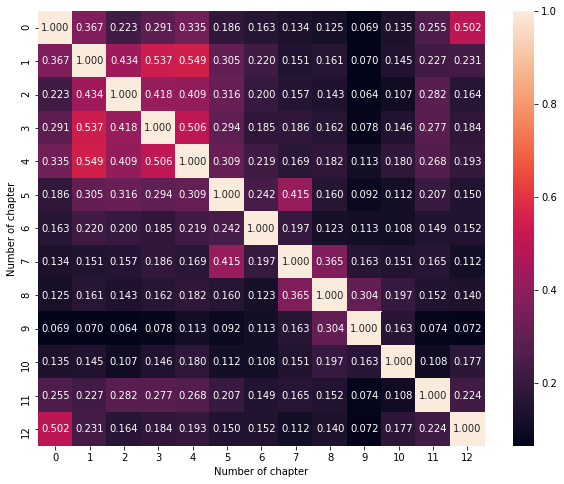

In [294]:
plt.subplots(figsize=(10,8))
sns.heatmap(df, annot=True, fmt='.3f')
plt.ylabel("Number of chapter")
plt.xlabel("Number of chapter")

In [295]:
print(len(vectors_ex2[1]), len(vectorizer.get_feature_names()))
count = []
for num in range(len(vectorizer.get_feature_names())):
    temp = 0
    for i in range(len(vectors_ex2)):
        temp += vectors_ex2[i][num]
    count.append(temp)
    
index = 0
bigger_than_400_ex2 = []
for i in range(len(count)):
    if count[i] > 400:
        print(f"index = {index}, count = {count[i]}")
        bigger_than_400_ex2.append(index)
    index += 1

10360 10360
index = 2712, count = 532.7575541882461
index = 3742, count = 426.0
index = 5722, count = 436.0878366944111
index = 6450, count = 776.0
index = 6455, count = 409.7416176955068
index = 6517, count = 754.8540413607446
index = 6541, count = 447.0460822137033
index = 7586, count = 471.0
index = 9292, count = 674.0
index = 9813, count = 463.0
index = 9829, count = 468.0
index = 10152, count = 834.0
index = 10186, count = 828.1372465305195


In [299]:
vec1_4_9 = []
for ch in [1, 4, 9]:
    temp = []
    for i in bigger_than_400_ex2:
        temp.append(vectors_ex2[ch][i])
    vec1_4_9.append(temp)

print(vec1_4_9)

[[11.815187693690941, 22.0, 56.92772252414726, 31.0, 0.0, 0.0, 0.0, 115.0, 109.0, 37.0, 46.0, 99.0, 138.5599284078301], [31.149131192457936, 53.0, 136.4117124635227, 49.0, 0.0, 0.0, 25.86217004542085, 125.0, 76.0, 79.0, 56.0, 112.0, 99.89204141029613], [0.0, 39.0, 6.444647832922332, 43.0, 0.0, 160.64042615734854, 365.76497635666635, 4.0, 1.0, 22.0, 17.0, 8.0, 2.148215944307444]]


<BarContainer object of 13 artists>

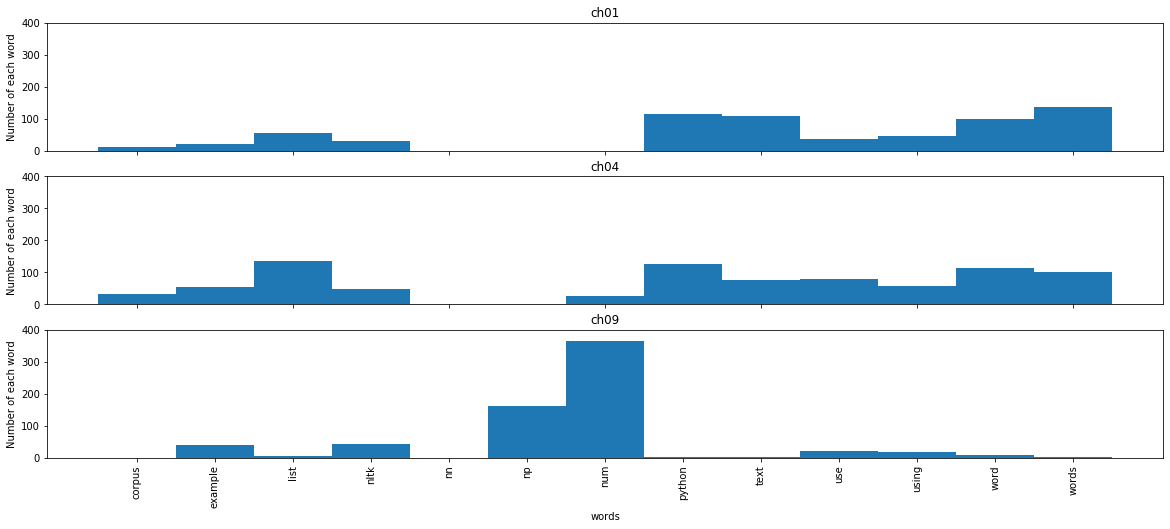

In [300]:
labels = []
for i in bigger_than_400_ex2:
    labels.append(vectorizer.get_feature_names()[i])

x = list(range(len(bigger_than_400_ex2)))
plt.subplots(figsize=(20,8))
plt.subplot(3,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[0], width=1.0)
plt.subplot(3,1,2, title="ch04", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[1], width=1.0)
plt.subplot(3,1,3, xticklabels=labels, title="ch09", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=400)
plt.bar(x, vec1_4_9[2], width=1.0)

In [296]:
vec1_3_4_9 = []
for ch in [1, 3, 4, 9]:
    temp = []
    for i in bigger_than_400_ex2:
        temp.append(vectors_ex2[ch][i])
    vec1_3_4_9.append(temp)

print(vec1_3_4_9)

[[11.815187693690941, 22.0, 56.92772252414726, 31.0, 0.0, 0.0, 0.0, 115.0, 109.0, 37.0, 46.0, 99.0, 138.5599284078301], [49.40896671907121, 44.0, 51.557182663378654, 82.0, 0.0, 0.0, 0.0, 90.0, 184.0, 84.0, 86.0, 117.0, 155.74565596228967], [31.149131192457936, 53.0, 136.4117124635227, 49.0, 0.0, 0.0, 25.86217004542085, 125.0, 76.0, 79.0, 56.0, 112.0, 99.89204141029613], [0.0, 39.0, 6.444647832922332, 43.0, 0.0, 160.64042615734854, 365.76497635666635, 4.0, 1.0, 22.0, 17.0, 8.0, 2.148215944307444]]


<BarContainer object of 13 artists>

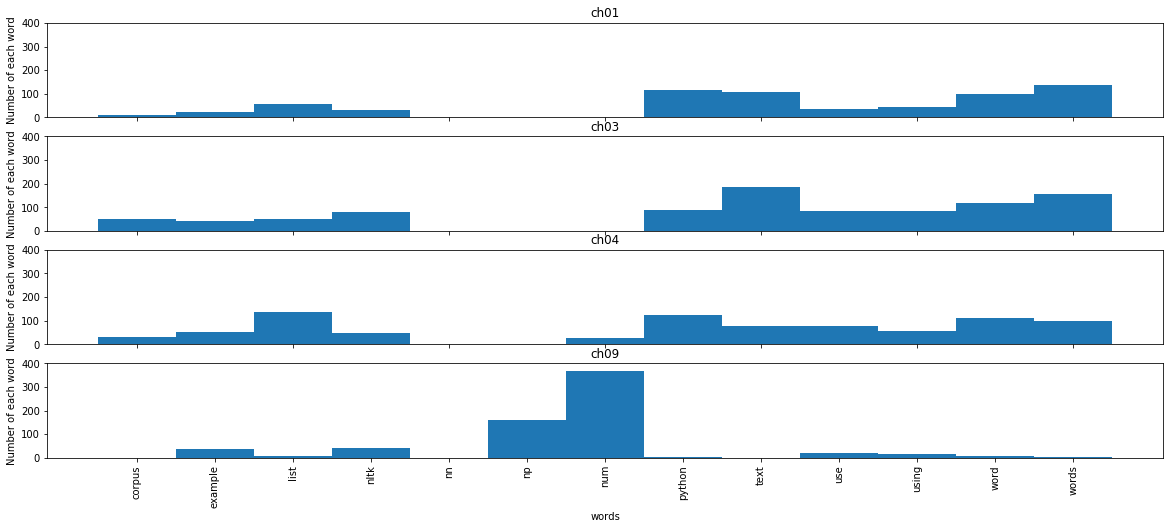

In [297]:
labels = []
for i in bigger_than_400_ex2:
    labels.append(vectorizer.get_feature_names()[i])

x = list(range(len(bigger_than_400_ex2)))
plt.subplots(figsize=(20,8))
plt.subplot(4,1,1, title="ch01", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_3_4_9[0], width=1.0)
plt.subplot(4,1,2, title="ch03", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_3_4_9[1], width=1.0)
plt.subplot(4,1,3, title="ch04", ylabel="Number of each word")
plt.xticks(visible=False)
plt.ylim(top=400)
plt.bar(x, vec1_3_4_9[2], width=1.0)
plt.subplot(4,1,4, xticklabels=labels, title="ch09", xlabel="words", ylabel="Number of each word")
plt.xticks(x, rotation=90)
plt.ylim(top=400)
plt.bar(x, vec1_3_4_9[3], width=1.0)